In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip /content/drive/MyDrive/scissordataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rock-Paper-Scissors/train/paper/paper04-118.png  
  inflating: Rock-Paper-Scissors/train/paper/paper04-119.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-000.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-001.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-002.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-003.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-004.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-005.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-006.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-007.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-008.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-009.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-010.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-011.png  
  inflating: Rock-Paper-Scissors/train/paper/paper05-012.png  
  in

In [37]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

input_shape = (300, 300, 3)
img_width = 300
img_height = 300

nb_train_samples = 2520
nb_validation_samples = 372
batch_size = 16
epochs = 10

train_data_dir = '/content/rock-paper-scissors/Rock-Paper-Scissors/train'
validation_data_dir = '/content/Rock-Paper-Scissors/test'

# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='categorical')

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        rotation_range = 30,
        horizontal_flip=True)  # randomly flip the images

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 298, 298, 64)      1792      
_________________________________________________________________
activation_30 (Activation)   (None, 298, 298, 64)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 149, 149, 64)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 147, 147, 32)      18464     
_________________________________________________________________
activation_31 (Activation)   (None, 147, 147, 32)      0         
_____________________________________

In [39]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 2520 // 16,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = 372 // 16)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
157/157 [==============================] - 20s 125ms/step - loss: 0.9778 - accuracy: 0.4416 - val_loss: 0.8636 - val_accuracy: 0.4212
Epoch 2/10
157/157 [==============================] - 19s 123ms/step - loss: 0.2831 - accuracy: 0.5835 - val_loss: 0.7458 - val_accuracy: 0.6884
Epoch 3/10
157/157 [==============================] - 19s 124ms/step - loss: 0.1684 - accuracy: 0.6237 - val_loss: 0.8426 - val_accuracy: 0.7210
Epoch 4/10
157/157 [==============================] - 19s 122ms/step - loss: 0.1088 - accuracy: 0.6520 - val_loss: 0.6824 - val_accuracy: 0.6812
Epoch 5/10
157/157 [==============================] - 19s 122ms/step - loss: 0.1074 - accuracy: 0.6707 - val_loss: 0.4958 - val_accuracy: 0.6784
Epoch 6/10
157/157 [==============================] - 19s 122ms/step - loss: 0.0875 - accuracy: 0.6878 - val_loss: 0.7896 - val_accuracy: 0.6793
Epoch 7/10
157/157 [==============================] - 19s 123ms/step - loss: 0.0905 - accuracy: 0.6964 - val_loss: 0.4764 - val_ac

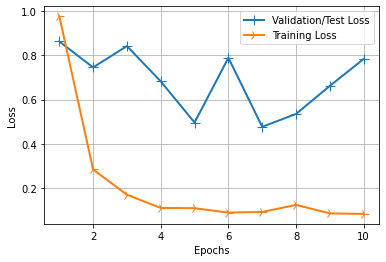

In [40]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

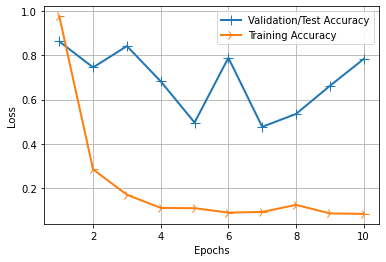

In [41]:
# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
acc_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive.h5")

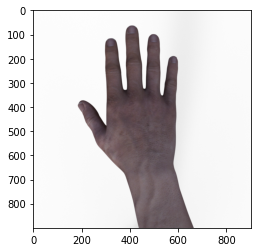

In [42]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

input_image_path = '/content/Rock-Paper-Scissors/validation/paper-hires2.png'

# Show our input Image for Feature visualization
img1 = image.load_img(input_image_path)
plt.imshow(img1);

img_size = (300, 300)
# load imamge into a 4D Tensor, convert it to a numpy array and expand to 4 dim
img1 = image.load_img(input_image_path, target_size = img_size)
image_tensor = image.img_to_array(img1)
#print(image_tensor.shape)
image_tensor = image_tensor/255
image_tensor = np.expand_dims(image_tensor, axis=0)
#print(img.shape)

## Creating a model from an input tensor and list of output tensors

To extract feature maps we create a Keras model that takes batches of images as input and outputs the activations of all convolution and pooling layers. 

In [43]:
from keras import models

# Extracts the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

# Creates a model that returns these outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

### Run our image through our model's prediction function

In [19]:
activations = activation_model.predict(image_tensor)

In [44]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 298, 298, 64)


### Let's take a look at the first channel

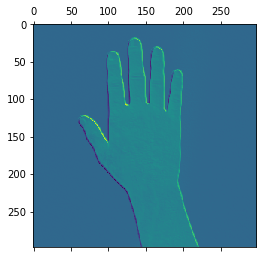

In [45]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

### Now let's look at the 7th Channel

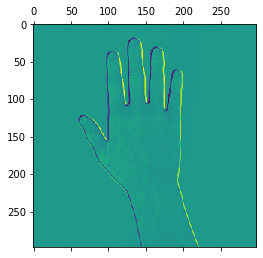

In [46]:
plt.matshow(first_layer_activation[0, :, :, 8], cmap='viridis')

### Let's plot all 32

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


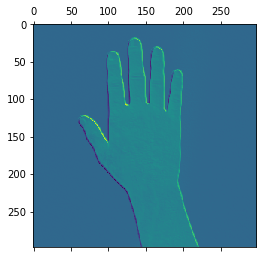

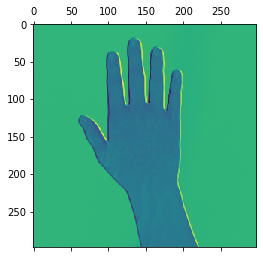

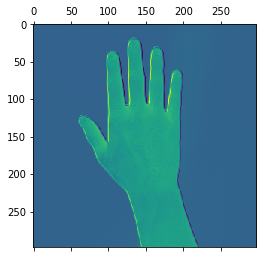

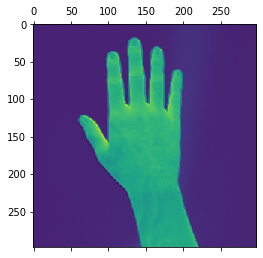

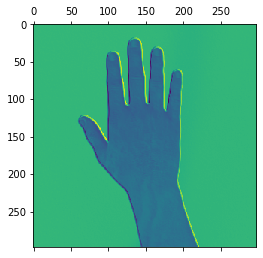

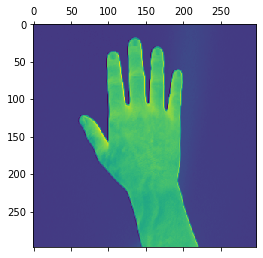

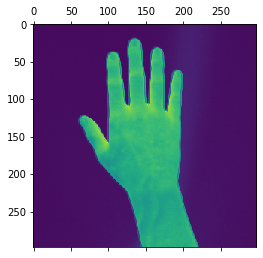

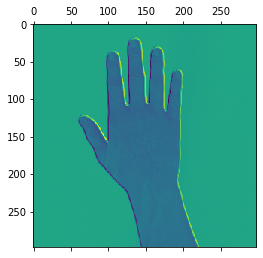

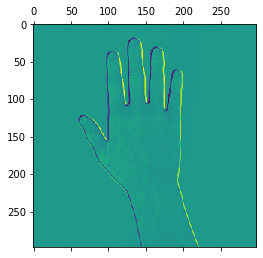

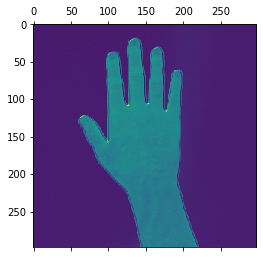

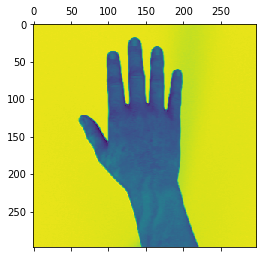

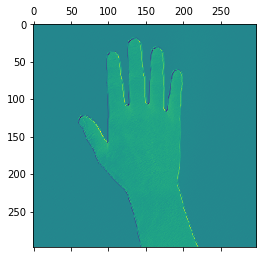

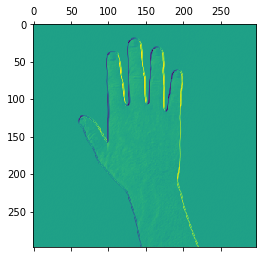

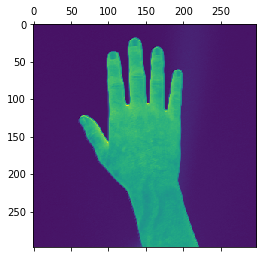

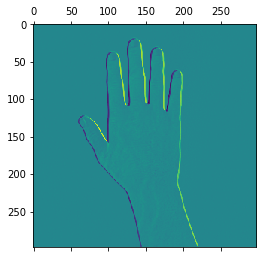

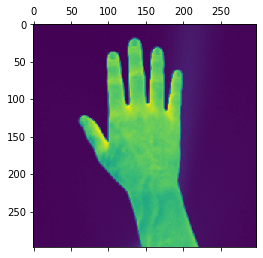

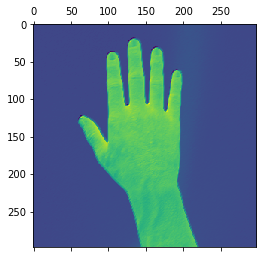

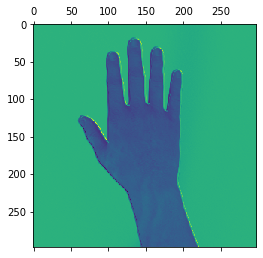

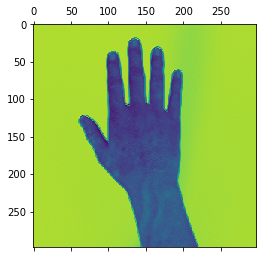

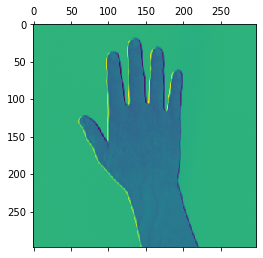

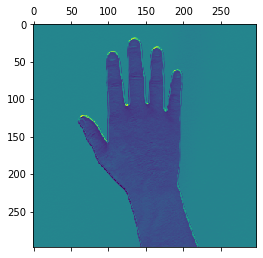

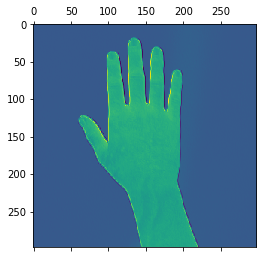

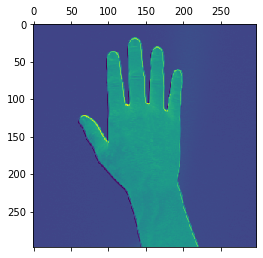

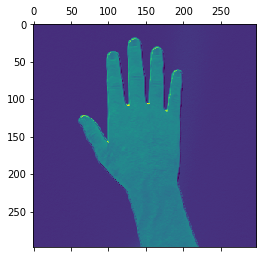

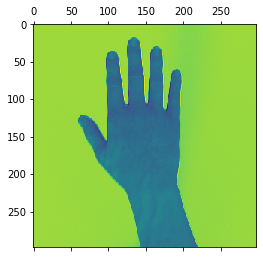

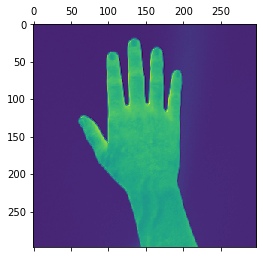

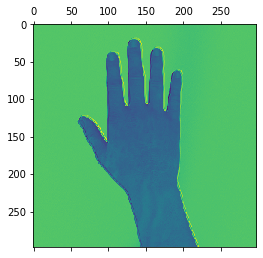

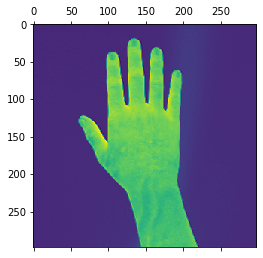

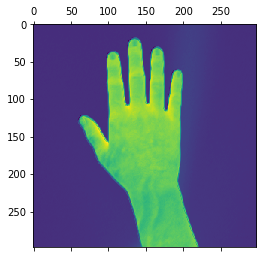

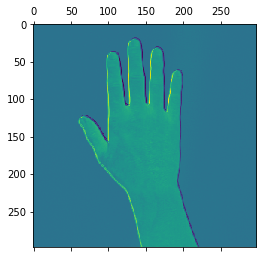

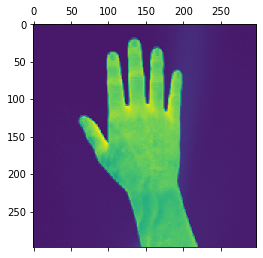

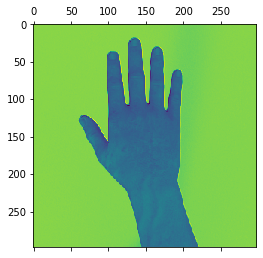

In [47]:
for i in range(0,32):
    plt.matshow(first_layer_activation[0, :, :,i], cmap='viridis')

## Visualizing every layer activation

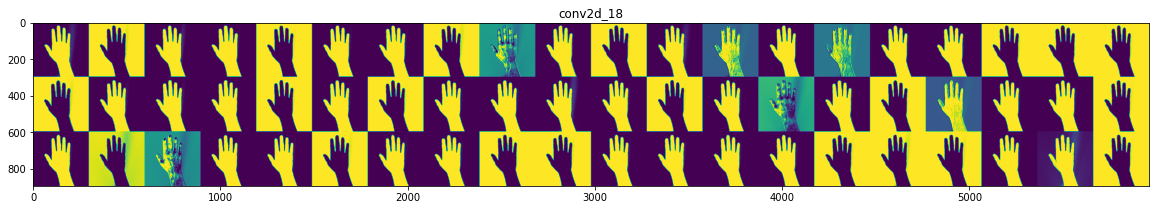

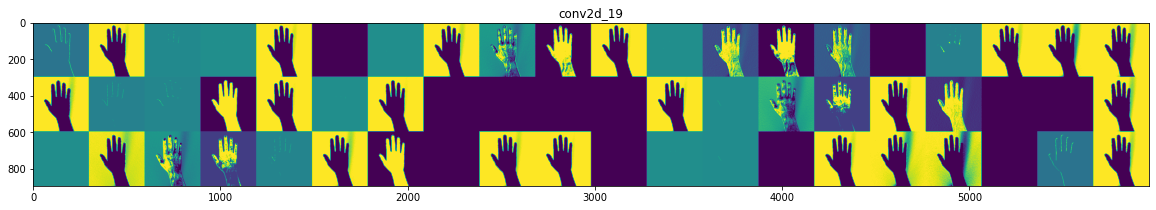

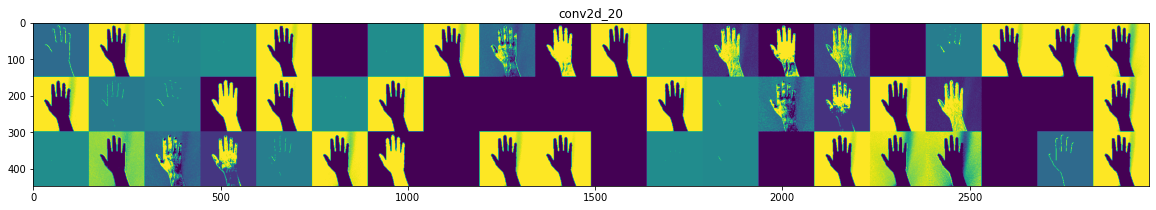

In [49]:
layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name)
images_per_row = 20

# Get CONV layers only
conv_layer_names = []
for layer_name in layer_names:
    if 'conv2d' in layer_name:
        conv_layer_names.append(layer_name)

for layer_name, layer_activation in zip(conv_layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 300
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Obersavations
   
- You an see that the first layers act mainly as different types of edge detectors and activations retain most of the input image.

- As we go higher up the network to the 2nd and 3rd  layers we can see the activations become more abstract and harder to interpret visually. But you may notice they retain high level visual concepts such as the cat eyes or outline or even cat ears.

- Many blank activations in the later deeper stages, this means that pattern encoded by those filters were not activated by the input image.
